In [17]:
from iminuit import cost, Minuit
import numpy as np
import matplotlib.pyplot as plt

from numba_stats import truncnorm, truncexpon, norm, expon
from scipy.stats import multivariate_normal as mvnorm

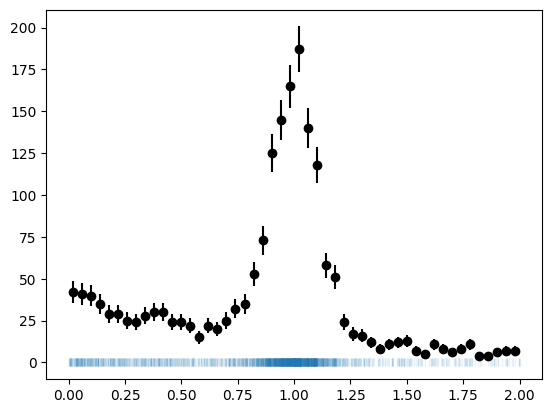

In [18]:
xr = (0, 2)  # xrange

rng = np.random.default_rng(1)

xdata = rng.normal(1, 0.1, size=1000)
ydata = rng.exponential(size=len(xdata))
xmix = np.append(xdata, ydata)
xmix = xmix[(xr[0] < xmix) & (xmix < xr[1])]

n, xe = np.histogram(xmix, bins=50, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xmix, np.zeros_like(xmix), "|", alpha=0.1);

In [19]:
def pdf(x, z, mu, sigma, tau):
    return (z * truncnorm.pdf(x, *xr, mu, sigma) +
            (1 - z) * truncexpon.pdf(x, *xr, 0.0, tau))

c = cost.UnbinnedNLL(xmix, pdf)

m = Minuit(c, z=0.4, mu=0.1, sigma=0.2, tau=2)
m.limits["z"] = (0, 1)
m.limits["sigma", "tau"] = (0, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 768.1                      │              Nfcn = 501              │
│ EDM = 6.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.537   │   0.015   │            │            │    0    │    1    │       │
│ 1 │ mu    │   0.996   │   0.004   │            │            │         │         │       │
│ 2 │ sigma │  0.1006   │  0.0035   │            │            │    0    │         │       │
│ 3 │ tau   │   1.05    │   0.08    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │         z        mu     sigma       tau │
├───────┼─────────────────────────────────────────┤
│     z │  0.000231 -3.06e-06   1.9e-05 -0.000236 │
│    mu │ -3.06e-06   1.5e-05 -9.51e-07 -1.54e-05 │
│ sigma │   1.9e-05 -9.51e-07  1.25e-05 -4.33e-05 │
│   tau │ -0.000236 -1.54e-05 -4.33e-05   0.00568 │
└───────┴─────────────────────────────────────────┘

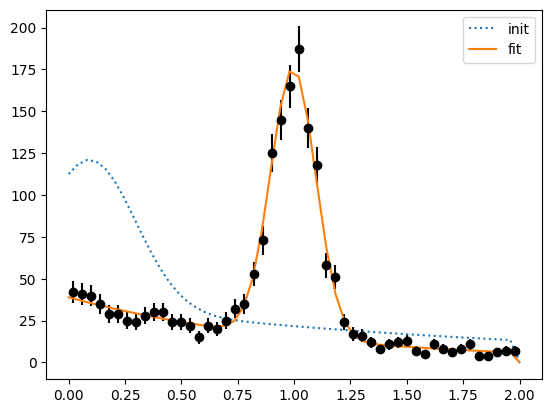

In [20]:
plt.errorbar(cx, n, n ** 0.5, fmt="ok")
xm = np.linspace(*xr)
plt.plot(xm, pdf(xm, *[p.value for p in m.init_params]) * len(xmix) * dx[0],
         ls=":", label="init")
plt.plot(xm, pdf(xm, *m.values) * len(xmix) * dx[0], label="fit")
plt.legend();